# 선형회귀

* 특성 데이터 -> 연속형 변수 예측
* 장점: 간단한 모델 구조
* 단점: 선형 관계를 전제로 함. 최신 알고리즘에 비해 예측력 떨어짐.

# 프로젝트 목표: 보험료 예측

* 미션: 보험 데이터셋을 이용하여 보험사에서 청구할 보험료 예측

* 데이터
    * 독립변수: 나이, 성별, BMI, 자녀 수, 흡연 여부
    * 종속변수: 보험사에서 청구하는 병원 비용

* 모델
    * 모델: LinearRegresison
    * 평가지표: RMSE

## 4.2 라이브러리 및 데이터 불러오기

In [1]:
import pandas as pd

In [2]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/insurance.csv'

In [3]:
data  = pd.read_csv(file_url)

## 4.3 데이터 확인하기

In [4]:
data

# 범주형 변수
# sex = [{1:"남자"}, {0: "여자"}]
# smoker = [{1: 흡연자"}, {0: "비흡연자"}]

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [5]:
data.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


In [7]:
data.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [8]:
round(data.describe(), 2)

,age,sex,bmi,children,smoker,charges
count,1338.00,1338.00,1338.00,1338.00,1338.0,1338.00
mean,39.21,0.51,30.66,1.09,0.2,13270.42
std,14.05,0.50,6.10,1.21,0.4,12110.01
min,18.00,0.00,15.96,0.00,0.0,1121.87
25%,27.00,0.00,26.30,0.00,0.0,4740.29
50%,39.00,1.00,30.40,1.00,0.0,9382.03
75%,51.00,1.00,34.69,2.00,0.0,16639.91
max,64.00,1.00,53.13,5.00,1.0,63770.43


## 4.4 전처리: 학습셋과 실험셋 나누기

In [9]:
X = data[['age', 'sex', 'bmi', 'children', 'smoker']]
y = data['charges']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100) #7:3/ 8:2 비율 분리 -> 경험적 판단

## 4.5 모델링

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()

In [14]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 4.6 모델을 활용해 예측하기

In [15]:
pred = model.predict(X_test)

## 4.7 예측 모델 평가하기

In [16]:
# 테이블로 평가하기
comparison = pd.DataFrame({'actual': y_test, 'pred': pred})

In [17]:
comparison

,actual,pred
12,1826.84300,4765.249466
306,20177.67113,4957.730865
318,7421.19455,8298.988153
815,1877.92940,3078.811868
157,15518.18025,24165.956542
...,...,...
713,1984.45330,5776.764928
1282,14283.45940,23102.847340
531,14043.47670,14280.732585
537,8825.08600,10527.417291


In [18]:
# 그래프로 평가하기
import matplotlib.pyplot as plt # ❶
import seaborn as sns # ❷

<Axes: xlabel='actual', ylabel='pred'>

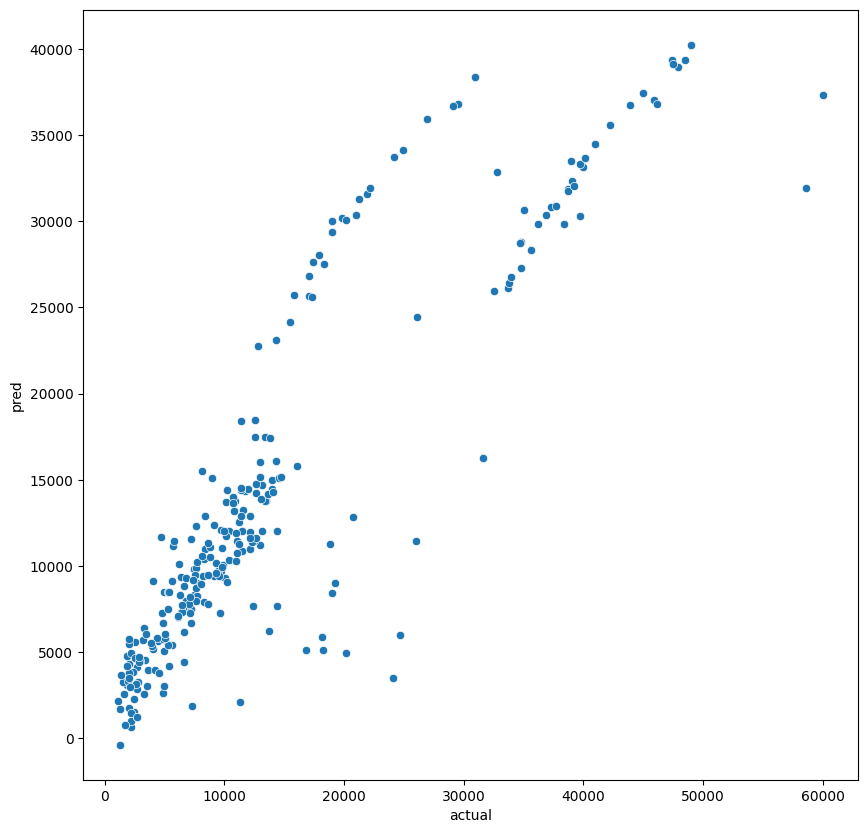

In [19]:
plt.figure(figsize=(10,10)) # ❶ 그래프 크기를 정의
sns.scatterplot(x = 'actual', y = 'pred', data = comparison) # ❷

### 통계적 평가지표

1. MAE: 평균 절대 오차
2. MSE: 평균 제곱 오차
3. RMSE: 루트 평균 제곱 오차 -> 가장 일반적으로 사용됨.

* 0에 가까울수록 좋은 지표
* 제곱 수식의 장점: 미분이 가능하다. (경사하강법과 관련)

In [25]:
!pip install -U "scikit-learn>=1.6,<2.0"

In [21]:
import sklearn
import inspect
from sklearn.metrics import mean_squared_error

print("scikit-learn 버전:", sklearn.__version__)
print(inspect.signature(mean_squared_error))

scikit-learn 버전: 1.7.1
(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')


In [22]:
# 통계적인 방법으로 접근하기: RMSE
from sklearn.metrics import mean_squared_error # ❶
mean_squared_error(y_test, pred) ** 0.5 # ❷

5684.927776334485

In [28]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 5684.927776334485


In [29]:
model.score(X_train, y_train) #0.7~0.8 이상일 경우 일반적으로 괜찮은 수치

0.7368220127747351

## 4.8 이해하기 : 선형 회귀 (Linear Regression)

### 손실함수 (Loss Function)

* 손실함수: 예측값과 실젯값의 차이
    * 손실함수를 최소화하는 선을 찾아서 예측 모델 생성
    * Ex. MSE, RMSE

* 손실함수 수식
    * 계수: model.coef_
        * 계수 내 비교: 수의 절댓값이 클수록 영향이 크다고 판단 가능
        * 계수 간 비교: 절댓값이 크다고 무조건 더 영향이 큰 것 아님. 변수 별 스케일의 차이. => 스케일링 작업 필요 (KNN)
    * 절편: model.intercept_
    

In [30]:
model.coef_

array([2.64799803e+02, 1.73446608e+01, 2.97514806e+02, 4.69339602e+02,
       2.34692802e+04])

In [31]:
pd.Series(model.coef_, index = X.columns)

,0
age,264.799803
sex,17.344661
bmi,297.514806
children,469.339602
smoker,23469.280173


In [32]:
model.intercept_

np.float64(-11576.999976112367)

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


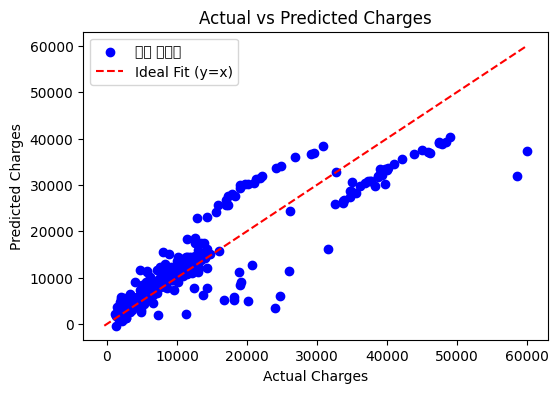

In [35]:
# 실제 데이터와 선형회귀식 시각화

# actual and predicted data
X = y_test
y = pred

# 시각화
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='blue', label="실제 데이터")   # 산점도

# Add the ideal regression line (where actual equals predicted)
plt.plot([min(X.min(), y.min()), max(X.max(), y.max())],
         [min(X.min(), y.min()), max(X.max(), y.max())],
         color='red', linestyle='--', label='Ideal Fit (y=x)')

# Configure font for Korean characters
plt.rcParams['font.family'] = 'NanumGothic' # You might need to install this font in your environment
plt.rcParams['axes.unicode_minus'] = False # To display minus signs correctly

plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.legend()
plt.show()

질문

1. 선형회귀식 모델의 실제 활용도는 어떻게 될까? 보험료 예측 외에 선형회귀를 사용할 수 있는 문제를 발굴해본다면, 무엇이 있을까?
2. 연속형 변수가 아닌 범주형 변수를 예측할 때 사용할 수 있는 모델은?